# Climate portfolio post

Your turn!

## Pick a new location and/or measurement to plot
🌏 📈

Recreate the workflow you just did in a place that interests you OR with
a different measurement. You will need to make your own new Markdown and
Code cells below this one, or create a new notebook.

Your analysis should include:

1.  A researched (with citations or links) **site description**,
    including *why* you chose the site
2.  A researched (with citations or links) **data description**,
    including a **data citation**
3.  A researched (with citations or links) **methods overview**
4.  Some kind of **visual evidence** (plot, chart, diagram) for your
    results
5.  A **headline and description** for the visual evidence that
    *interprets* your analysis and puts it *in context*

You should also delete the instructions before submitting a portfolio page.

To submit your portfolio post, we're going to do something a little different this week, to see if it is easier:

 1. Put it in your portfolio repository, along with any images or interactive html visualization
 2. Add a markdown file to the `posts/02-climate` folder that contains a link to your portfolio.

# Back Bay National Wildlife Refuge
![Golden sunset over Back Bay, USFWS, Public Domain, https://www.fws.gov/media/golden-sunset-over-back-bay](https://www.fws.gov/media/golden-sunset-over-back-bay)

"<a href="https://www.fws.gov/refuge/back-bay" target="_blank">Back Bay National Wildlife Refuge</a> is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish."
This site was located because of its coastal location in Virginia and an interest in how coastal areas are responding to changing temperatures.


In [1]:
# Ignore FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Packages
import pandas as pd
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Data Description
Data citation

In [2]:
# Assign data URL to a variable.
Back_Bay_url = ('https://www.ncei.noaa.gov/access/services/data/v1?'
            'dataset=daily-summaries'
            '&dataTypes=TOBS'
            '&stations=USC00440385'
            '&startDate=1954-01-01'
            '&endDate=2006-12-31'
            '&units=metric')
Back_Bay_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00440385&startDate=1954-01-01&endDate=2006-12-31&units=metric'

In [3]:
Back_Bay_df = pd.read_csv(
    Back_Bay_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
Back_Bay_df

,STATION,TOBS
DATE,,
1954-01-01,USC00440385,10.0
1954-01-02,USC00440385,7.8
1954-01-03,USC00440385,8.3
1954-01-04,USC00440385,3.9
1954-01-05,USC00440385,17.2
...,...,...
2006-12-27,USC00440385,12.2
2006-12-28,USC00440385,11.7
2006-12-29,USC00440385,12.8


In [4]:
Back_Bay_df = Back_Bay_df[['TOBS']]
Back_Bay_df

,TOBS
DATE,
1954-01-01,10.0
1954-01-02,7.8
1954-01-03,8.3
1954-01-04,3.9
1954-01-05,17.2
...,...
2006-12-27,12.2
2006-12-28,11.7
2006-12-29,12.8


In [5]:
# Resample data to obtain the mean annual temperature.
ann_Back_Bay_df = Back_Bay_df.resample('YS').mean()
ann_Back_Bay_df.head()

,TOBS
DATE,
1954-01-01,16.236639
1955-01-01,15.188022
1956-01-01,15.817403
1957-01-01,15.886150
1958-01-01,14.340278


In [6]:
ann_Back_Bay_df.index = ann_Back_Bay_df.index.year.values
ann_Back_Bay_df.head()

,TOBS
1954,16.236639
1955,15.188022
1956,15.817403
1957,15.886150
1958,14.340278


In [11]:
# Plot the annual data interactively
ann_Back_Bay_plt = ann_Back_Bay_df.hvplot(y='TOBS',
    title='Observed Mean Annual Temperature (C) of \nBack Bay National Wildlife Refuge, VA, USA',
    xlabel='Year',
    ylabel='Mean Annual Temperature (Celsius)'
    )

ann_Back_Bay_plt

:Curve   [index]   (TOBS)

In [8]:
# Regression analysis
# Plot trend line

In [9]:
# Fit an OLS Linear Regression to the data

# Drop NaN values
ann_Back_Bay_df_clean = ann_Back_Bay_df.dropna()

# Reshape 'Year' column to be a 2D array for scikit-learn
X = ann_Back_Bay_df_clean.index.values.reshape(-1,1)
Y = ann_Back_Bay_df_clean['TOBS'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.08651782919984703
Intercept: -154.216761420806


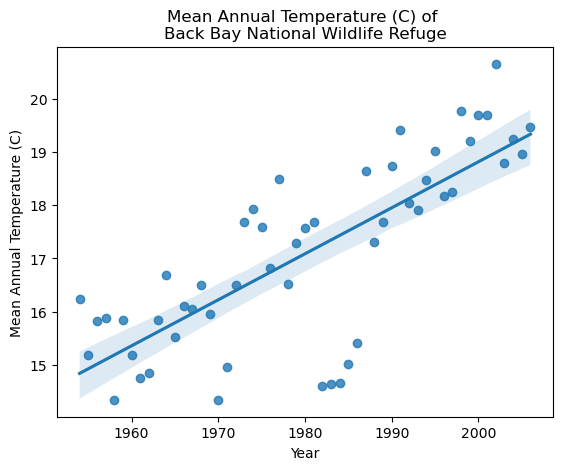

In [12]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_Back_Bay_df_clean.index.values, 
    y=ann_Back_Bay_df_clean['TOBS'].values,
    )
# Set plot labels
ax.set(
    title='Mean Annual Temperature (C) of \nBack Bay National '
        'Wildlife Refuge',
    xlabel='Year',
    ylabel='Mean Annual Temperature (C)'
)
# Display the plot without extra text
plt.show()

Interpret